In [1]:
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer

In [2]:
# metrics to check : 
# 1)taux d'erreur
# 2)Precision **** to maximise
# 3)Rappel **** also to maximise ensemble
# 4)ROC : well we create one to maximise precision then one model to maximise rappelnd see which one perfoms better on both metrics(ROC)
# 5)moyenne harmonique de P et R (F-meùsure): 
# rapport : basically talk abt ur experiments, what did u want to try, el hypothese that we had to go after this,
#           how, analyze ur work and results u have 
#           (like saying ah we tried *this* ama we find out that our F1 score worse by this margin or better)
#           rendu : pdf rapport, zip for code

In [3]:
# we gotta change i'm to i am and can't to cannot and maybe we find can not we try to cahnge to cannot too 
#so we create a compteur that counts how many time we changed it from "smth"(not literally since we leave aka #smth in it's place f blaset'ha xd)  to cannot mais plutot on compte combien de cannot appeared that's r not #actually cannot 

In [4]:
# we gotta change i'm to i am and can't to cannot and maybe we find can not we try to cahnge to cannot too 
#so we create a compteur that counts how many time we changed it from "smth"(not literally since we leave aka 
# #smth in it's place f blaset'ha xd)  to cannot mais plutot on compte combien de cannot appeared that's r not 
# #actually cannot 

In [5]:
df = (pd.read_fwf('./train.txt', colspecs=[(1,4),(6,-1)], header=None).set_axis(['country','description'], axis=1))


In [6]:
df.head()

,country,description
0,GER,IThe importance and popularity of travelling i...
1,TUR,"It is an important decision , how to plan your..."
2,CHI,Some people believe that young people can enjo...
3,TEL,Travelling is usually considered as good recre...
4,ARA,i agree that . Life is a person live period of...


In [7]:
le = preprocessing.LabelEncoder()
df['y_country'] = le.fit_transform(df.country)

In [8]:
df

,country,description,y_country
0,GER,IThe importance and popularity of travelling i...,3
1,TUR,"It is an important decision , how to plan your...",10
2,CHI,Some people believe that young people can enjo...,1
3,TEL,Travelling is usually considered as good recre...,9
4,ARA,i agree that . Life is a person live period of...,0
...,...,...,...
9895,CHI,"Nowadays , more and more people go abroad , no...",1
9896,KOR,In accomplishing something that is risky comes...,7
9897,SPA,"At the beginning of the 21st century , the inc...",8
9898,HIN,The number of cars in use across the world has...,4


In [9]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

def clean_review(text):
    """
    Clean the input text 
    """
    cleaned_text = text.lower()
    #cleaned_text =  re.sub(r'^https?:\/\/.*[\r\n]*', '', cleaned_text)
    cleaned_text = re.sub('<.*>', '', cleaned_text)
    cleaned_text = re.sub('[^a-zA-Z0-9\s]', '', cleaned_text)
    cleaned_text = cleaned_text.split()
    #cleaned_text = [word for word in cleaned_text if word not in stopwords and len(word) > 1]
    
    return " ".join(cleaned_text)

In [10]:
df['cleaned_description'] = df['description'].apply(lambda x: clean_review(x))

In [11]:
df.head()

,country,description,y_country,cleaned_description
0,GER,IThe importance and popularity of travelling i...,3,ithe importance and popularity of travelling i...
1,TUR,"It is an important decision , how to plan your...",10,it is an important decision how to plan your s...
2,CHI,Some people believe that young people can enjo...,1,some people believe that young people can enjo...
3,TEL,Travelling is usually considered as good recre...,9,travelling is usually considered as good recre...
4,ARA,i agree that . Life is a person live period of...,0,i agree that life is a person live period of t...


In [12]:
X = df['cleaned_description'].values.tolist() 
Y = df['y_country'].values.tolist()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [61]:
#1st confusion matrix 
def model(X ,Y):
    X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                        Y,stratify=Y,
                                                        test_size=0.1111, shuffle=True)
    
    #would be better if u split data before then fit then transform  
    tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
    tf_Xtrain = tf.fit_transform(X_train)
    tf_Xtest = tf.transform(X_test)
    
    clf = LinearSVC( max_iter = 2000, verbose= 2)
    clf.fit(tf_Xtrain,y_train)
    y_pred = clf.predict(tf_Xtest)
    print("accuracy", accuracy_score(y_test,y_pred))
    
    y_test = le.inverse_transform(y_test)
    y_pred = le.inverse_transform(y_pred)
    
    labels = ['JPN', 'KOR', 'CHI',  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER']
    cf = confusion_matrix(y_test, y_pred, labels = labels)
    cf_df = pd.DataFrame(cf ,index = labels, columns = labels)
    
    return cf_df

In [62]:
cf_df = model(X,Y)
cf_df1 = model(X,Y)
cf_df2 = model(X,Y)
cf_df3 = model(X,Y)

[LibLinear]accuracy 0.7209090909090909
[LibLinear]accuracy 0.6781818181818182
[LibLinear]accuracy 0.6972727272727273
[LibLinear]accuracy 0.7245454545454545


In [63]:
cf_sum = cf_df + cf_df1 + cf_df2 + cf_df3

<AxesSubplot: >

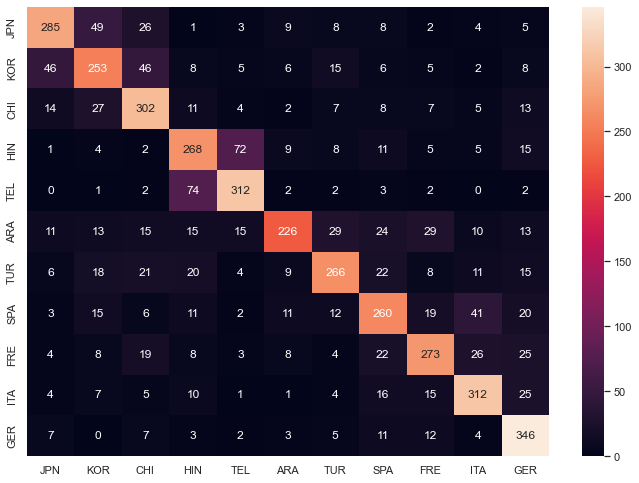

In [64]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cf_sum, annot=True, fmt='g')

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, 
                                                    Y,stratify=Y,
                                                    test_size=0.1111,  shuffle=True)

In [36]:
#would be better if u split data before then fit then transform  
tf = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tf_Xtrain = tf.fit_transform(X_train)

In [37]:
tf_Xtest = tf.transform(X_test)

In [38]:
tf_Xtest

<1100x656384 sparse matrix of type '<class 'numpy.float64'>'
	with 168675 stored elements in Compressed Sparse Row format>

In [39]:
#X_test_vect =  pd.DataFrame(data = tf_Xtest.toarray())
#X_train_vect = pd.DataFrame(data = tf_Xtrain.toarray())
#X_test_vect.columns = tf.get_feature_names()
#X_train_vect.columns = tf.get_feature_names()
#X_train_vect.head()

In [40]:
#from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#from sklearn.ensemble import RandomForestClassifier


In [41]:
clf = LinearSVC( max_iter = 2000, verbose= 2)
#clf = RandomForestClassifier(n_estimators=1000,verbose = 2,n_jobs = -1 )

In [42]:
clf.fit(tf_Xtrain,y_train)

[LibLinear]

LinearSVC(max_iter=2000, verbose=2)

In [43]:
y_pred = clf.predict(tf_Xtest)

In [44]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))


0.6972727272727273


### - Confusion matrix 

In [45]:
labels = le.classes_.tolist()

In [46]:
y_test = le.inverse_transform(y_test)
y_pred = le.inverse_transform(y_pred)

In [47]:
labels = ['JPN', 'KOR', 'CHI',  'HIN',  'TEL', 'ARA',  'TUR', 'SPA',  'FRE', 'ITA' ,'GER']

In [48]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, y_pred, labels = labels)

In [49]:
cf_df = pd.DataFrame(cf ,index = labels, columns = labels)

<AxesSubplot: >

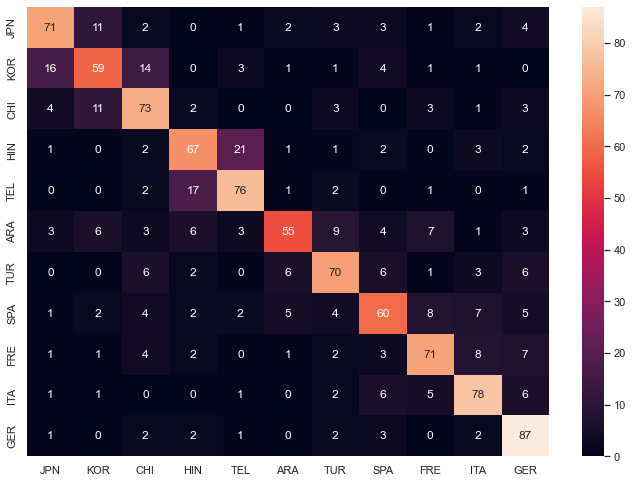

In [50]:
import seaborn as sns
sns.heatmap(cf_df, annot=True)
#basically run on Ytest, we have a 1st table with 100 results 
#re do the thing without losing our 1st table 
#then we have two tables we add them together and in that way we coul have a better undestanding of our matrix

In [51]:
cf_sum = cf_df + cf_df1

<AxesSubplot: >

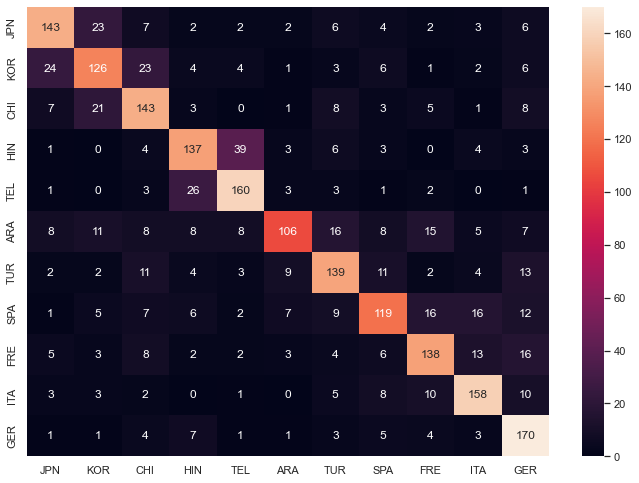

In [52]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(cf_sum, annot=True, fmt='g')

## Classifier Cascades

In [39]:
pd.DataFrame(y_test).value_counts()

0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
dtype: int64